In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


2024-05-03 16:22:20.979861: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-03 16:22:20.981067: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-03 16:22:20.984940: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-03 16:22:21.021126: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 16:22:21.852113: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Generate data
x = np.linspace(-np.pi, np.pi, 200)
y = np.sin(x)


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:

# Training the model
model.fit(x, y, epochs=2000, verbose=0)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


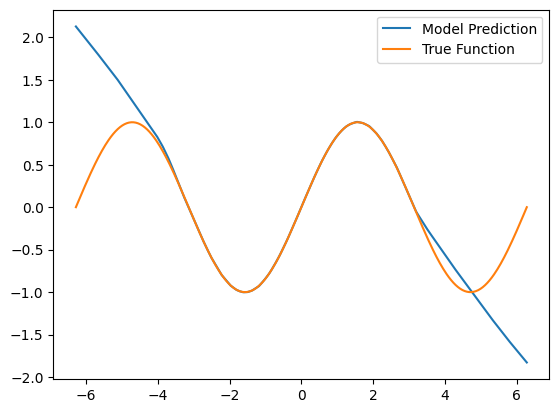

In [4]:

# Test the model
test_x = np.linspace(-2*np.pi, 2*np.pi, 400)
test_y = model.predict(test_x)

# Plotting results
plt.plot(test_x, test_y, label='Model Prediction')
plt.plot(test_x, np.sin(test_x), label='True Function')
plt.legend()
plt.show()
